Se instala e importan las librerías requeridas

In [1]:
#%pip install tabulate
#%pip install openpyxl

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from tabulate import tabulate
import numpy as np
import matplotlib. pyplot as plt
import time

Se realiza un manejo previo de los datos a revisión

In [3]:
# ---------- Manejo de Datos ----------

# Cargar los datos desde el archivo Excel
df = pd.read_excel('datos_decodificados.xlsx', header=0)

BPM = "Latidos por minuto (BPM)"
BPM2 = "Latidos por minuto (BPM)2"
Tiempo = "Tiempo (s)"
BER74 = "BER"
BER1511 = "BER1511"

# Extraer los datos de la columna seleccionada
DatosLatidos = df[BPM]
DatosLatidos2 = df[BPM2]
DatosTiempo = df[Tiempo]
DatosBER = df[BER74[0:20]]
DatosBER1511 = df[BER1511[0:20]]

Se desarrollan algunas listas necesarias

In [4]:
# ---------- Zonas de Entrenamiento ----------

Zona1T = []
Zona1L = []
Zona2T = []
Zona2L = []
Zona3T = []
Zona3L = []
Zona4T = []
Zona4L = []
Zona5T = []
Zona5L = []


FCmax = max(DatosLatidos)
Z1 = round(FCmax*.65,2)
Z2 = round(FCmax*.8,2)
Z3 = round(FCmax*.85,2)
Z4 = round(FCmax*.95,2)
#Z5 = round(FCmax*.95,2)

cont = -1

for i in DatosLatidos:
    cont = cont+1
    if i < 0:
        continue
    elif i > 0 and i <= Z1:     # i < 65%
        Zona1T.append(DatosTiempo[cont])
        Zona1L.append(DatosLatidos[cont])
    elif i > Z1 and i <= Z2:    # 65% < i < 80%
        Zona2T.append(DatosTiempo[cont])
        Zona2L.append(DatosTiempo[cont])
    elif i > Z2 and i <= Z3:    # 80% < i < 85%
        Zona3T.append(DatosTiempo[cont])
        Zona3L.append(DatosTiempo[cont])
    elif i > Z3 and i <= Z4:    # 85% < i < 95%
        Zona4T.append(DatosTiempo[cont])
        Zona4L.append(DatosTiempo[cont])
    else:
        Zona5T.append(DatosTiempo[cont])
        Zona5L.append(DatosTiempo[cont])


Se realiza las tablas de las zonas

In [5]:
# ---------- Tablas de Zonas ----------

# Zona 1
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona1T, Zona1L))
tablaZ1 = tabulate(infotabla, headers, tablefmt="grid")

# Zona 2
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona2T, Zona2L))
tablaZ2 = tabulate(infotabla, headers, tablefmt="grid")

# Zona 3
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona3T, Zona3L))
tablaZ3 = tabulate(infotabla, headers, tablefmt="grid")

# Zona 4
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona4T, Zona4L))
tablaZ4 = tabulate(infotabla, headers, tablefmt="grid")

# Zona 5
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona5T, Zona5L))
tablaZ5 = tabulate(infotabla, headers, tablefmt="grid")

Información importante final

In [6]:
# ---------- Resultados ----------

print("A partir de los estudios, se determina que las zonas de frecuencias son:")
print("Frecuencia Cardíaca máxima: ", FCmax)
print("Calentamiento (Zona 1): Inferior a", Z1)
print("Quema Grasa (Zona 2): Entre ",Z1, " y ", Z2)
print("Aeróbica (Zona 3): Entre ",Z2, " y ", Z3)
print("Anaeróbica (Zona 4): Entre ", Z3, " y ", Z4)
print("Extrema (Zona 5): Superior a ", Z4)
print(" ----------------------------------------")

print(" Las tablas resultantes para cada zona son:")
print("Tabla para Zona 1: Calentamiento: \n",tablaZ1)
print("Tabla para Zona 2: Quema Grasa: \n",tablaZ2)
print("Tabla para Zona 3: Aeróbica: \n",tablaZ3)
print("Tabla para Zona 4: Anaeróbica: \n",tablaZ4)
print("Tabla para Zona 5: Extrema: \n",tablaZ5)
print(" ----------------------------------------")



A partir de los estudios, se determina que las zonas de frecuencias son:
Frecuencia Cardíaca máxima:  164
Calentamiento (Zona 1): Inferior a 106.6
Quema Grasa (Zona 2): Entre  106.6  y  131.2
Aeróbica (Zona 3): Entre  131.2  y  139.4
Anaeróbica (Zona 4): Entre  139.4  y  155.8
Extrema (Zona 5): Superior a  155.8
 ----------------------------------------
 Las tablas resultantes para cada zona son:
Tabla para Zona 1: Calentamiento: 
 +----------+--------------+
|   Tiempo |   Frecuencia |
+==========+==============+
|        0 |           90 |
+----------+--------------+
|       10 |           91 |
+----------+--------------+
|       20 |           93 |
+----------+--------------+
|       30 |           92 |
+----------+--------------+
|       40 |           93 |
+----------+--------------+
|       50 |           96 |
+----------+--------------+
|       60 |           94 |
+----------+--------------+
|       70 |           96 |
+----------+--------------+
|       80 |           97 |
+---

Grafica de las Zonas de Entrenamiento por Niveles

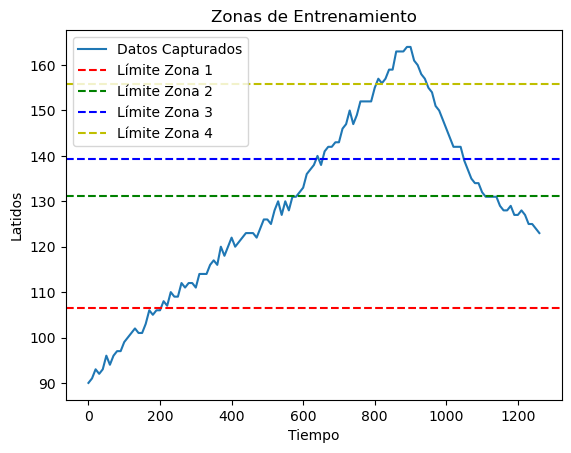

In [7]:
plt.figure()
plt.plot(DatosTiempo, DatosLatidos, label="Datos Capturados")
plt.axhline(y=Z1, color='r', linestyle='--', label = "Límite Zona 1")
plt.axhline(y=Z2, color='g', linestyle='--', label = "Límite Zona 2")
plt.axhline(y=Z3, color='b', linestyle='--', label = "Límite Zona 3")
plt.axhline(y=Z4, color='y', linestyle='--', label = "Límite Zona 4")
#plt.axhline(y=, color='r', linestyle='--')
plt.title("Zonas de Entrenamiento")
plt.xlabel("Tiempo")
plt.ylabel("Latidos")
plt.legend()
plt.show()


Gráfica de BER

In [8]:
# ---------- Gráfica de Bit Error Rate----------

Iteraciones = []
DatosBER74_req = list(DatosBER[0:21])
Iteraciones2 = []
DatosBER1511_req = list(DatosBER1511[0:21])
cont = 1
cont2 = 1

for i in DatosBER:
    if i > 0:
        Iteraciones.append(cont)
        cont = cont+1
    else:
        continue

for i in DatosBER1511:
    if i > 0:
        Iteraciones2.append(cont2)
        cont2 = cont2+1
    else:
        continue


print(Iteraciones)
print(DatosBER74_req)
print(Iteraciones2)
print(DatosBER1511_req)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0.25, 0.25, 0.25, 0.25, 0.2, 0.2083333333333333, 0.2142857142857143, 0.21875, 0.2222222222222222, 0.225, 0.2272727272727273, 0.2291666666666667, 0.2307692307692308, 0.2142857142857143, 0.2, 0.1875, 0.1764705882352941, 0.1666666666666667, 0.1710526315789474, 0.1625, 0.1666666666666667]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0.002777777777777778, 0.0027472527472527475, 0.002688172043010753, 0.002717391304347826, 0.002150537634408602, 0.0021701388888888886, 0.002279635258358663, 0.0022786458333333335, 0.0022909507445589916, 0.0023195876288659794, 0.0022956841138659324, 0.002291666666666667, 0.0022848438690022854, 0.002100840336134454, 0.0019801980198019802, 0.0018564356435643563, 0.0017133066818960593, 0.0015723270440251578, 0.001629072681704261, 0.0015330188679245284, 0.0015723270440251578]


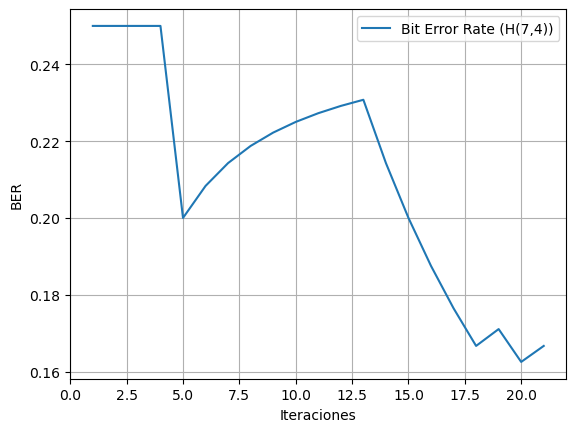

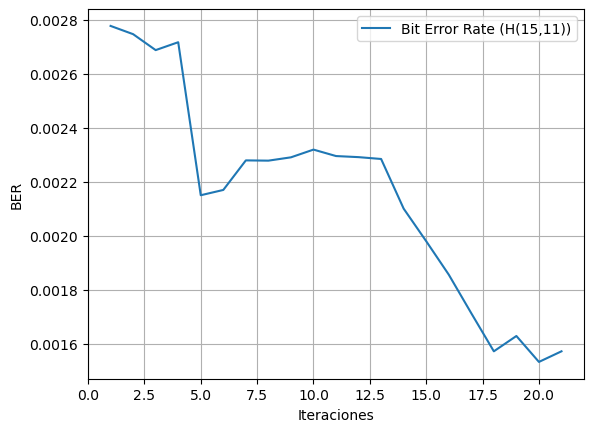

In [9]:
# Grafica de BER74
plt.figure()
plt.plot(Iteraciones, DatosBER74_req, label="Bit Error Rate (H(7,4))")
plt.xlabel("Iteraciones")
plt.ylabel("BER")
plt.legend()
plt.grid()
plt.show()

# Grafica de BER1511
plt.figure()
plt.plot(Iteraciones2, DatosBER1511_req, label="Bit Error Rate (H(15,11))")
plt.xlabel("Iteraciones")
plt.ylabel("BER")
plt.legend()
plt.grid()
plt.show()

Gráfica de Latidos por Minuto

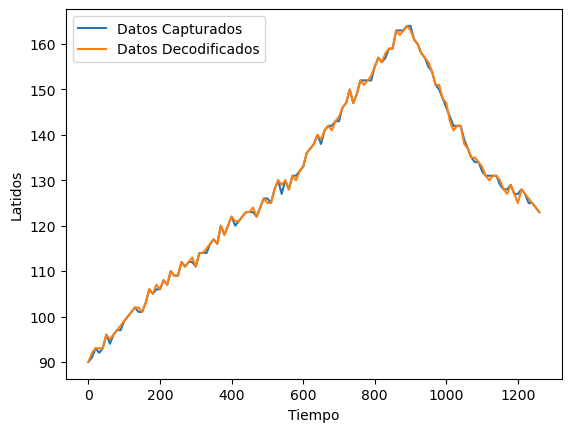

In [10]:
# ---------- Gráfica de Latidos por Minuto ----------

plt.figure()
plt.plot(DatosTiempo, DatosLatidos, label="Datos Capturados")
plt.plot(DatosTiempo, DatosLatidos2, label = "Datos Decodificados")
plt.xlabel("Tiempo")
plt.ylabel("Latidos")
plt.legend()
plt.show()
